<a href="https://colab.research.google.com/github/JinGunseon/FinanceDataAnalysis/blob/main/%EC%8B%A4%EC%8A%B5_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series data 시각화

In [2]:
!pip install --upgrade pandas-datareader
!pip install --upgrade finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.5 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr
import pandas_datareader as data_reader
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (12, 5)

#한글 폰트 사용
import platform
from matplotlib import font_manager

if platform.system() == "Darwin":  #Mac
    plt.rc('font', family='AppleGothic')
else:
    !apt-get update -qq
    !apt-get install -qq fonts-nanum
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    #font_path = 'C:/Windows/Fonts/malgun.ttf' # For Windows
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False  #한글사용시 마이너스 사인 깨짐 방지

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


### 원달러 환율 시각화

- FRED(Federal Reserve Economic Data) 에서 원달러 환율 가져오기

`DEXKOUS` - South Korea Won-Dollar 환율

Text(0.5, 1.0, '원-달러 환율 변동')

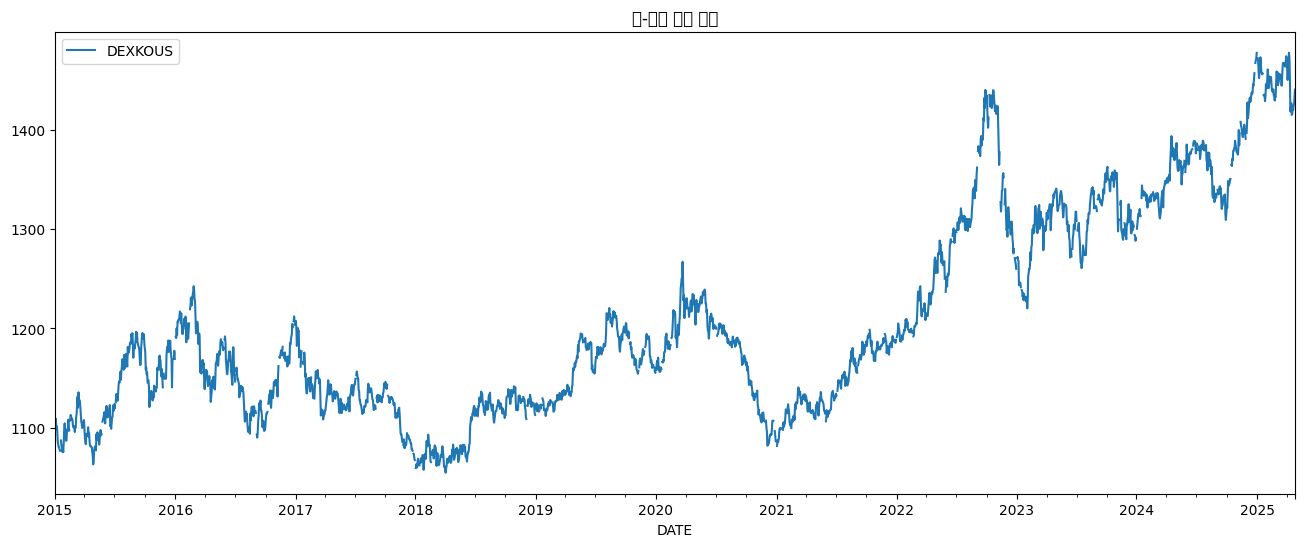

In [8]:
import pandas_datareader as data_reader

df = data_reader.DataReader('DEXKOUS', 'fred', '2015-01-01')
df.plot(figsize=(16, 6))
plt.title("원-달러 환율 변동")

## cufflinks 로 candle chart 그리기

cufflinks라이브러리 자체에서 plotly 와 연동이 되어서 예쁘고 쉽게 그래프를 그릴 수 있다.

`df.iplot` : plotly chart 그리기  
- shape : figure의 shape  
- default plot : line chart

candle stick 생성

- EMA : Exponential Moving Average.
- SMA : Simple Moving Average

# 시각화를 통한 주식 시장의 변동 장기 분석
- 역사적 바닥, 천장 시각화  
- 미국, 한국 시장, 금리 비교  
- 비트코인 추세 시각화

- 1970 년대 이후의 다우 존수 종합 지수 변동 시각화

In [11]:
!pwd

/content


In [14]:
dji1 = pd.read_csv("/content/sample_data/DJI_1970.csv")
dji1

,Date,Open,High,Low,Close,Volume
0,1970-01-02,800.40,813.60,797.30,809.20,907895
1,1970-01-05,809.20,819.20,804.80,811.30,1295865
2,1970-01-06,811.30,814.10,798.70,803.70,1292481
3,1970-01-07,803.70,808.50,796.20,801.80,1128948
4,1970-01-08,801.80,809.30,796.90,802.10,1203384
...,...,...,...,...,...,...
13126,2022-01-12,36336.16,36453.49,36168.15,36290.32,361798146
13127,2022-01-13,36312.49,36513.88,36044.22,36113.62,395636110
13128,2022-01-14,35996.43,35996.43,35641.49,35911.81,439707231
13129,2022-01-18,35661.76,35661.76,35262.02,35368.47,490284707


가격의 변화가 큰 경우 y 축을 log scale로 취하면 실제 가격 변동률의 착시 현상을 없앨 수 있다. (같은 등락률이 같은 길이로 표현)

### 1973~74년 1차 오일 쇼크
- 1979년 이란 혁명. 전세계적으로 물가는 상승하면서 실업 등의 문제는 오히려 심각해지는 스태그플레이션이 나타났으며, 미국의 FRB는 급작스럽게 불어난 달러를 미국 은행으로 회수하기 위해 금리를 21%까지 인상

### Dow Jones 1974 년 바닥 이후 V자 급등

### dot-com bubble (2000 년 3월)
- 인터넷 관련 분야가 성장하면서 산업 국가의 주식 시장이 지분 가격의 급속한 상승을 본 1995년부터 닷컴 버블이 붕괴된 2001년까지 걸친 거품 경제 현상

### 버블 붕괴 시의 다우존스 지수 하락

### 2000 년 3월 dot-com bubble의 Nasdaq 붕괴
1) 3/7 거래량이 크게 증가하며 하락  
2) 3/10 오전장에서만 85 포인트 뛰어 오르며 사상 최고치 경신. 오후에 급락하여 불과 2 포인트 상승으로 마감.  거래량은 평균치 보다 13%나 많음. stall day (기관이 팔고 있다는 표시)  
3) 3/14 대량 거래와 함께 4%나 하락  
4) 3/16~24 까지 상승세. 랠리가 다시 시작되는 것 아닌가 하는 착각을 불러 일으킴.  
5) 4번째 매물 출회되며 상승세에 찬물을 끼얹음.  stall day.  
6) 5번째 매물 출회

### Nasdaq 지수의 2003 년 바닥 확인 후 V자 상승

### 금융위기 (2007 - 2010)
-  2007년 4월(서브프라임 모기지 사태) 또는 2008년 9월부터 미국에서 시작된 세계 규모의 경제 위기

### 2019년 코로나 팬데믹과 2022년의 하락세

- 2019년 12월 중국 우한에서 최초 발생  
- 한국 종합주가 지수와 비교

### 2020년 양적 완화 이후의 주가 회복

## 비트코인 가격 추세